In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality-uci-machine-learning-repository/winequality.names
/kaggle/input/wine-quality-uci-machine-learning-repository/winequality-white.csv
/kaggle/input/wine-quality-uci-machine-learning-repository/winequality-red.csv


In [2]:
white_df = pd.read_csv('/kaggle/input/wine-quality-uci-machine-learning-repository/winequality-white.csv',sep=';')
red_df = pd.read_csv('/kaggle/input/wine-quality-uci-machine-learning-repository/winequality-red.csv',sep=';')

In [3]:
# white_df.describe()

In [4]:
# red_df.describe()

In [5]:
# red_df.sample(5)

In [6]:
# white_df.head()

In [7]:
# pd.isnull('white_df')
# pd.isnull('red_df')

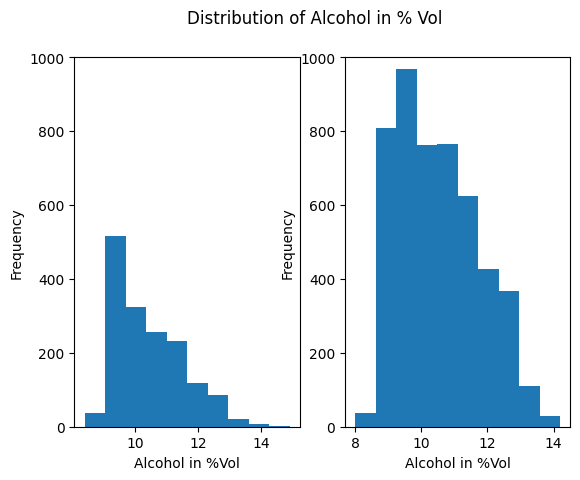

In [8]:
import matplotlib.pyplot as plt
fig,axis = plt.subplots(1,2)
axis[0].hist(red_df.alcohol, label='Red Wine')
axis[0].set_xlabel('Alcohol in %Vol')
axis[0].set_ylabel('Frequency')
axis[0].set_ylim([0,1000])

axis[1].hist(white_df.alcohol,label = 'White Wine')
axis[1].set_xlabel('Alcohol in %Vol')
axis[1].set_ylabel('Frequency')
axis[1].set_ylim([0,1000])
fig.suptitle('Distribution of Alcohol in % Vol')
plt.show()

In [9]:
# import seaborn as sns
# sns.pairplot(data = red_df, diag_kind = 'auto')

In [10]:
red_df['type'] = 1
white_df['type'] = 0
wines_df = pd.concat([red_df, white_df], ignore_index=True)
wines_df
type(wines_df)

pandas.core.frame.DataFrame

In [11]:
# Data Splitting
from sklearn.model_selection import train_test_split
x = wines_df.iloc[:,0:11]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [12]:
y = np.ravel(wines_df.type)
y

array([1, 1, 1, ..., 0, 0, 0])

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 40)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
# Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential() 
model.add(Dense(12,activation = 'sigmoid',input_shape = (11,)))
model.add(Dense(8,activation = 'sigmoid'))
model.add(Dense(1,activation = 'sigmoid'))

model.output_shape
model.summary()

2024-06-03 15:20:08.717280: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-03 15:20:08.717420: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-03 15:20:08.887244: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.get_config()

{'name': 'sequential',
 'trainable': True,
 'dtype': 'float32',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 11),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 12,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'build_config': {'input_shape': (None, 11)}},
  {'module': 'keras.layers',
 

In [17]:
model.get_weights()

[array([[-0.16672704,  0.4104616 ,  0.2955972 ,  0.03776771,  0.43317437,
          0.01843709,  0.47158706, -0.4693955 ,  0.20079857,  0.18618554,
          0.01940066, -0.37913585],
        [-0.50081164, -0.45006397, -0.48011956, -0.32287988,  0.49330682,
          0.4444232 ,  0.452591  , -0.03753403, -0.18716326, -0.43221617,
          0.36994755, -0.5077286 ],
        [-0.22130165, -0.12546527,  0.2912482 ,  0.3787257 , -0.11893579,
         -0.4018408 , -0.09075528, -0.23281762, -0.16599202, -0.21568352,
         -0.09050685,  0.0583989 ],
        [ 0.13741136,  0.17643368, -0.09237376,  0.09980243,  0.3751576 ,
          0.07926172,  0.40276408,  0.3791194 , -0.2311039 , -0.02940518,
          0.0725795 ,  0.09607154],
        [-0.11331767, -0.13627714,  0.3981099 ,  0.13512677, -0.17243016,
         -0.36918527,  0.09262449, -0.1661681 ,  0.4634627 ,  0.25605828,
         -0.06822649,  0.2145006 ],
        [ 0.0175826 ,  0.23119241, -0.06555054, -0.26302007, -0.32825935,
      

In [18]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy'])

In [19]:
# Model Training
history = model.fit(x_train, y_train, epochs = 20, batch_size = 1, verbose = 1)
history

Epoch 1/20
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8663 - loss: 0.3080
Epoch 2/20
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9925 - loss: 0.0443
Epoch 3/20
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9949 - loss: 0.0277
Epoch 4/20
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9931 - loss: 0.0240
Epoch 5/20
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9968 - loss: 0.0179
Epoch 6/20
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9953 - loss: 0.0225
Epoch 7/20
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9954 - loss: 0.0224
Epoch 8/20
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9958 - loss: 0.0253
Epoch 9/20
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9961 - loss: 0.0201
Epoch 10/20
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9974 - loss: 0.0177
Epoch 11/20
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9968 - loss: 0.0164
Epoch 12/20
4547/4547 ━━━━

In [20]:
# Model Evaluation
y_pred = np.round(model.predict(x_test))
y_pred[0:10]

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [21]:
loss, acc = model.evaluate(x_test, y_test, verbose = 0)
print('Test Accuracy:%.3f'%acc)
loss, acc = model.evaluate(x_train, y_train, verbose = 0)
print('Test Accuracy:%.3f'%acc)

Test Accuracy:0.992
Test Accuracy:0.998


In [22]:
from sklearn import metrics
print(pd.DataFrame(metrics.confusion_matrix(y_test,y_pred,labels = [0,1]),index = ['true:White','true:Red'],columns = ['pred:White','pred:Red']))

            pred:White  pred:Red
true:White        1470         6
true:Red             9       465


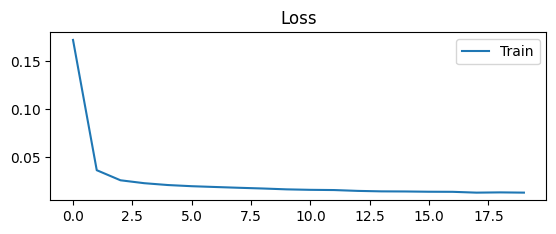

In [23]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label = 'Train')
plt.legend()
plt.show()


In [24]:
model.get_weights()

[array([[ 2.78762251e-01,  2.99820065e-01,  3.32443804e-01,
         -4.91839617e-01,  5.44611931e-01,  2.13410318e-01,
          4.67399806e-01, -3.34978610e-01, -5.20800292e-01,
         -9.79472473e-02, -2.30652019e-02, -1.36727467e-01],
        [-6.08448803e-01, -1.58057492e-02, -1.83047569e+00,
          3.20758373e-02,  1.37127209e+00,  2.04715586e+00,
          1.50350779e-01,  2.60260791e-01,  8.52436647e-02,
         -1.89353719e-01,  4.57742482e-01, -1.82455039e+00],
        [-5.30594409e-01, -3.34173322e-01, -7.57106170e-02,
          3.83000076e-01, -1.06678128e-01,  1.17645070e-01,
          8.93625095e-02, -3.17630380e-01, -5.73078617e-02,
         -3.58850323e-02,  1.02626592e-01, -5.50138503e-02],
        [ 8.50080788e-01, -6.34397805e-01,  7.86637008e-01,
         -6.47797287e-01, -3.63237739e-01, -8.15439224e-01,
          1.29041886e+00, -8.45465958e-01, -8.24477136e-01,
         -9.55426574e-01,  1.16398478e+00,  9.49761569e-01],
        [-2.46479392e+00,  2.1038031